In [1]:
# Classification
# read the csv file which prepared in Pre-Classification
import pandas as pd
df = pd.read_csv('kol_features.csv')

In [2]:
# check Added_HK_IG account
# df[['ig_id', 'Added_HK_IG']].sort_values(by='Added_HK_IG', ascending=False)

In [3]:
# add the packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# See the features correaltion
test_df = df.dropna().reset_index(drop=True)
test_df['is_HK'] = test_df['is_HK']=='Hong Kong'

KeyError: 'is_HK'

<AxesSubplot:>

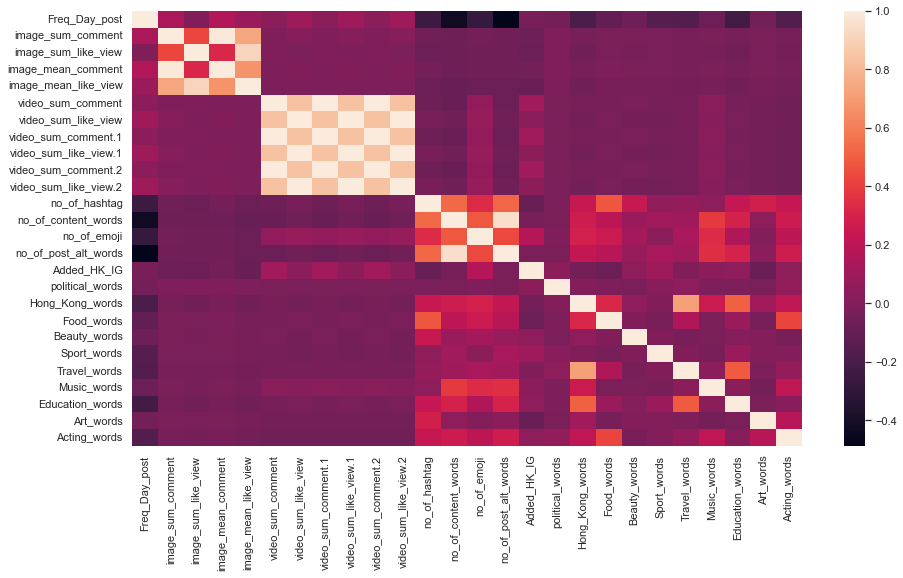

In [5]:
# Heatmap to see the correlation of each features
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(test_df.corr())

In [6]:
# Let start the simple classification
test_df2 = test_df[0:40]
data = {'food':    [0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
        'beauty':  [0,0,1,1,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
        'sport':   [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1],
        'music':   [0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1],
        'art':     [0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1],
        'media':   [1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
        'hongkong':[1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,0],
       }

df_class = pd.DataFrame(data)
# test food so only get the food result to dataframe
df_class2 = df_class[['food']]
test_df3 = pd.concat([df_class2, test_df2], join="outer", axis=1)

In [13]:
test_df4 = test_df3[['Food_words']]
test_df4 = test_df4.dropna()

In [8]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    test_df4[['Food_words']], 
    test_df4['Food_words'],
    test_size=0.2,
    random_state=444 # every random will be same result
    )

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
cls = RandomForestClassifier()
cls.fit(X_train, y_train)
y_pred_a = cls.predict(X_test)
y_true_a = (y_pred_a == y_test)
print(y_true_a)

17     True
20     True
1      True
13     True
4     False
30     True
5      True
11    False
Name: Food_words, dtype: bool


In [17]:
print(y_pred_a)

[ 1.  0.  1.  1. 13.  0.  0.  6.]


In [18]:
from sklearn.metrics import precision_recall_fscore_support

In [19]:
from sklearn.metrics import confusion_matrix

In [22]:
# Random Forest
precision_recall_fscore_support(y_pred_a, y_test, average="binary")

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [21]:
y_true_a.mean()

0.75

In [17]:
confusion_matrix(y_true_a, y_pred_a) # Singleton array 0.875 cannot be considered a valid collection.

array([[0, 0],
       [1, 7]])

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_b = gnb.predict(X_test)
y_true_b = (y_pred_b == y_test)
print(y_true_b)

17     True
20     True
1     False
13     True
4      True
30     True
5      True
11     True
Name: hongkong, dtype: bool


In [20]:
print(y_pred_b)

[1 1 1 1 1 1 1 1]


In [21]:
# Gaussian
precision_recall_fscore_support(y_pred_b, y_test, average="binary" )

(1.0, 0.875, 0.9333333333333333, None)

In [22]:
y_true_b.mean()

0.875

In [23]:
confusion_matrix(y_true_b, y_pred_b)

array([[0, 1],
       [0, 7]])

In [24]:
# ROC curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

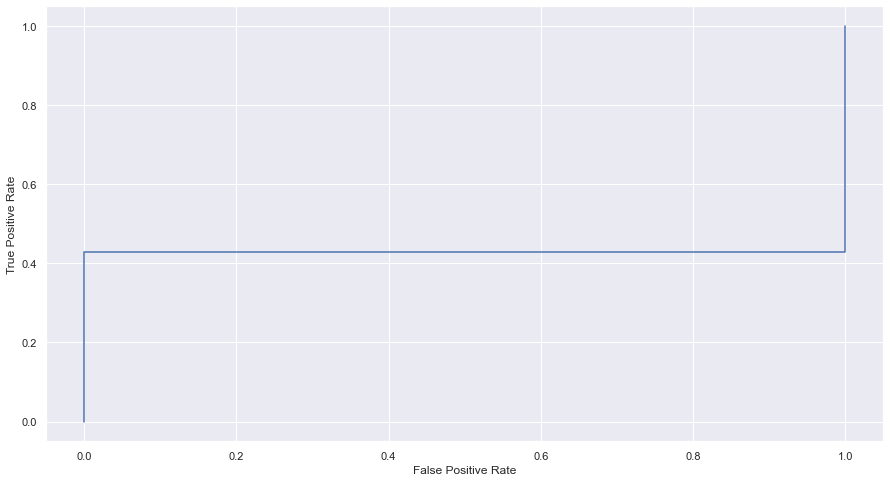

In [25]:
log_regression = LogisticRegression()
log_regression.fit(X_train,y_train)
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# Data is too small